## Observations and Insights

In [313]:
# 1. The 2 drugs that performed the best Ramicane and Capomulin also had the largest number of data points.
# This may have skewed the data in their favor as there was more opportunity for the drug to perform well.

# 2. Ramicane and Capomulin has lower final tumor volumes than their average tumor volume while Ceftamin and Infubinol
# had higher final tumor volumes.

# 3. On average, heavier mice had larger average tumor sizes. This suggests that average change in tumor size, not
# not final tumor volume might be a better value to determine the efficacy of a drug as mouse weights vary significantly.

## Script

In [3]:
#Import matplotlib inline
%matplotlib inline

In [253]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Assign variables to study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Merge the data into a single dataset
joined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')

#Print merged dataset
joined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Dependencies and starter code

## Summary statistics

In [254]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create new dataframe from joined_data, group by drug regimen
reduced_data = joined_data[['Drug Regimen', 'Tumor Volume (mm3)']]
grouped_by_drug = reduced_data.groupby(["Drug Regimen"])

#Calculate summary stats
tumor_volume_mean = grouped_by_drug["Tumor Volume (mm3)"].mean()
tumor_volume_median = grouped_by_drug["Tumor Volume (mm3)"].median()
tumor_volume_variance = grouped_by_drug["Tumor Volume (mm3)"].var()
tumor_volume_stdev = grouped_by_drug["Tumor Volume (mm3)"].std()
tumor_volume_sem = grouped_by_drug["Tumor Volume (mm3)"].sem()

#Create dataframe to display summary stats
summary_stats_table = pd.DataFrame({"Tumor Volume Mean": tumor_volume_mean, "Tumor Volume Median": tumor_volume_median, "Tumor Volume Variance": tumor_volume_variance, "Tumor Volume Standard Dev.": tumor_volume_stdev, "Tumor Volume Standard Error of the Mean": tumor_volume_sem})

#Display summary stats table
summary_stats_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

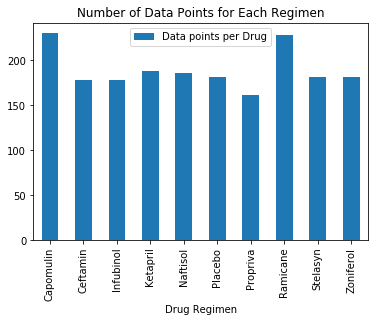

In [295]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Find number of data points for each drug regimen
counts_per_drug = grouped_by_drug['Drug Regimen'].count()

#Create new dataframe with counts for each drug and generate bar plot
drug_counts_df = pd.DataFrame({"Data points per Drug": counts_per_drug})
drug_counts_df.plot.bar(y = "Data points per Drug", title = "Number of Data Points for Each Regimen")

## Pie plots

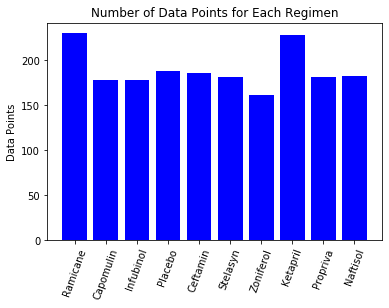

In [296]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Create array of unique values in Drug Regimen column
drug_options = joined_data["Drug Regimen"].unique()

# Find length of drug options array to determine how many x positions there should be
x_pos = np.arange(len(drug_options))

# Plot bar chart using pyplot, assign title
plt.bar(x_pos, counts_per_drug, color="b", align="center")
plt.xticks(x_pos, drug_options, rotation=70)
plt.ylabel('Data Points')
plt.title('Number of Data Points for Each Regimen')

# Print bar plot
plt.show()

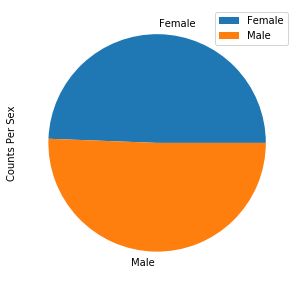

In [311]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group joined_data by sex, count number of each value in sex column
grouped_by_sex = joined_data.groupby(["Sex"])
counts_per_sex = grouped_by_sex['Sex'].count()

# Create new dataframe displaying counts of each sex
sex_df = pd.DataFrame({"Counts Per Sex": counts_per_sex})

# Plot pie chart using pandas
sex_df.plot.pie(y='Counts Per Sex', figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x1a2541f630>,
 [Text(-0.7887477729166416, -0.904365496201087, 'Female'),
  Text(0.723018791840255, 0.8290017048509963, 'Male')],
 [Text(-0.4601028675347076, -0.527546539450634, '49.4%'),
  Text(0.39437388645832083, 0.4521827481005434, '50.6%')])

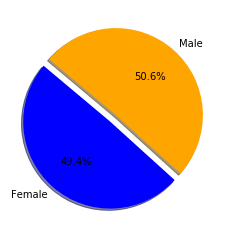

In [310]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Generate pie chart labels
labels = ["Female", "Male"]

# Assign colors
colors = ["blue", "orange"]

# Explode out male section
explode = (0.1, 0)

# Display pie chart using pyplot
plt.pie(counts_per_sex, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [261]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Determine most promising 4 treatments

# Isolate joined_data by final timepoint
final_timepoint_only = joined_data.loc[(joined_data["Timepoint"] == 45)]

# Groupby drug regimen
final_by_drug = final_timepoint_only.groupby(["Drug Regimen"])

#Find mean final tumor volume per drug across all mice to determine which were the top 4
mean_final_tumor_per_drug = final_by_drug['Tumor Volume (mm3)'].mean().sort_values(ascending=True).head(4)

#Print 4 most promising treatments: Ramicane, Capomulin, Ceftamin, Infubinol
print(mean_final_tumor_per_drug) 

#Isolate final tumor volume for all mice given Ramicane
ramicane_only_df = joined_data.loc[(joined_data["Drug Regimen"] == "Ramicane")]
ramicane_grouped = ramicane_only_df.groupby(["Mouse ID", "Drug Regimen"])
ramicane_full = ramicane_grouped[["Tumor Volume (mm3)"]]
ramicane_last = ramicane_full.last()
ramicane_values = ramicane_last['Tumor Volume (mm3)']

#Establish ramicane quantiles as quartiles, assign lower and upper quartile variables
ramicane_quartiles = ramicane_values.quantile([.25,.5,.75])
lowerq = ramicane_quartiles[0.25]
upperq = ramicane_quartiles[0.75]

#Calculate iqr then upper and lower bounds to determine outlier limits
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Cycle through all ramicane values to see if they exceed the lower or upper bound thresholds
# If they do, print the value
for x in ramicane_values:
    if x > upper_bound or x < lower_bound:
        print(f"{x} is a potential outlier")

#Isolate final tumor volume for all mice given Capomulin
capomulin_only_df = joined_data.loc[(joined_data["Drug Regimen"] == "Capomulin")]
capomulin_grouped = capomulin_only_df.groupby(["Mouse ID", "Drug Regimen"])
capomulin_full = capomulin_grouped[["Tumor Volume (mm3)"]]
capomulin_last = capomulin_full.last()
capomulin_values = capomulin_last['Tumor Volume (mm3)']

#Establish Capomulin quantiles as quartiles, assign lower and upper quartile variables
capomulin_quartiles = capomulin_values.quantile([.25,.5,.75])
lowerq = capomulin_quartiles[0.25]
upperq = capomulin_quartiles[0.75]

#Calculate iqr then upper and lower bounds to determine outlier limits
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Cycle through all Capomulin values to see if they exceed the lower or upper bound thresholds
# If they do, print the value
for x in capomulin_values:
    if x > upper_bound or x < lower_bound:
        print(f"{x} is a potential outlier")

#Isolate final tumor volume for all mice given Infubinol
infubinol_only_df = joined_data.loc[(joined_data["Drug Regimen"] == "Infubinol")]
infubinol_grouped = infubinol_only_df.groupby(["Mouse ID", "Drug Regimen"])
infubinol_full = infubinol_grouped[["Tumor Volume (mm3)"]]
infubinol_last = infubinol_full.last()
infubinol_values = infubinol_last['Tumor Volume (mm3)']

#Establish Infubinol quantiles as quartiles, assign lower and upper quartile variables
infubinol_quartiles = infubinol_values.quantile([.25,.5,.75])
lowerq = infubinol_quartiles[0.25]
upperq = infubinol_quartiles[0.75]

#Calculate iqr then upper and lower bounds to determine outlier limits
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Cycle through all Infubinol values to see if they exceed the lower or upper bound thresholds
# If they do, print the value
for x in infubinol_values:
    if x > upper_bound or x < lower_bound:
        print(f"{x} is a potential outlier for Infubinol")

#Isolate final tumor volume for all mice given Ceftamin
ceftamin_only_df = joined_data.loc[(joined_data["Drug Regimen"] == "Ceftamin")]
ceftamin_grouped = ceftamin_only_df.groupby(["Mouse ID", "Drug Regimen"])
ceftamin_full = ceftamin_grouped[["Tumor Volume (mm3)"]]
ceftamin_last = ceftamin_full.last()
ceftamin_values = ceftamin_last['Tumor Volume (mm3)']

#Establish Ceftamin quantiles as quartiles, assign lower and upper quartile variables
ceftamin_quartiles = infubinol_values.quantile([.25,.5,.75])
lowerq = ceftamin_quartiles[0.25]
upperq = ceftamin_quartiles[0.75]

#Calculate iqr then upper and lower bounds to determine outlier limits
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Cycle through all Ceftamin values to see if they exceed the lower or upper bound thresholds
# If they do, print the value
for x in ceftamin_values:
    if x > upper_bound or x < lower_bound:
        print(f"{x} is a potential outlier for Ceftamin")


Drug Regimen
Ramicane     34.955595
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Name: Tumor Volume (mm3), dtype: float64
36.321345799999996 is a potential outlier for Infubinol


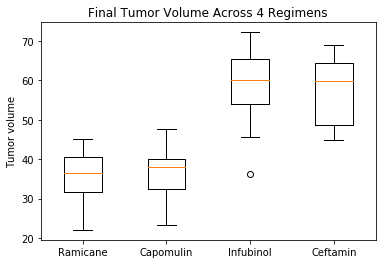

In [301]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Assign box plot values and labels
box_plot_data = [ramicane_values, capomulin_values, infubinol_values, ceftamin_values]
labels = ["Ramicane" , "Capomulin" , "Infubinol" , "Ceftamin"]

# Plot box plots
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume Across 4 Regimens')
ax.boxplot(box_plot_data, labels = labels)
plt.ylabel('Tumor volume')
plt.show()

## Line and scatter plots

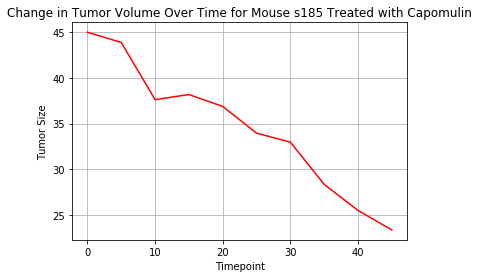

In [291]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original dataframe by Campomulin
capomulin_only_df = joined_data.loc[(joined_data["Drug Regimen"] == "Capomulin")]

# Filter Campomulin data by only mouse s185
mouse_s185 = capomulin_only_df.loc[(capomulin_only_df["Mouse ID"] == "s185")]

# Assign variables for time data from mouse_s185's Timepoint column
time = mouse_s185['Timepoint']

# Assign variables for tumor volume data from mouse_s185's Tumor Volume (mm3) column
tumor_volume = mouse_s185['Tumor Volume (mm3)']

# Plot on line chart and assign labels
plt.plot(time, tumor_volume, color="red", label="Danger Drop")
plt.title("Change in Tumor Volume Over Time for Mouse s185 Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size")
plt.grid()
plt.show()

Text(0, 0.5, 'Average Tumor Size')

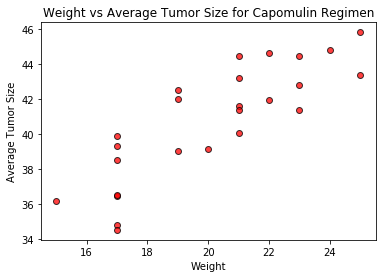

In [262]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Drop duplicates from Mouse ID column in the Capomulin only dataframe
individual_mice = capomulin_only_df.drop_duplicates(["Mouse ID"])

# Set mouse ID as index
mice = individual_mice.set_index("Mouse ID")

# Locate mouse weight data from Weight (g) column and sort Mouse ID index in order
mouse_weights = mice.loc[:, "Weight (g)"].sort_index(ascending=True)

# Get average tumor volume data for each mouse, take the average and sort Mouse ID index in order 
mean_tumor_per_mouse = grouped_by_mouse['Tumor Volume (mm3)'].mean().sort_index(ascending=True)

# Generate scatter plot of values
plt.scatter(mouse_weights, mean_tumor_per_mouse, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Weight vs Average Tumor Size for Capomulin Regimen")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Size")

The r-squared is: 0.8419363424694718


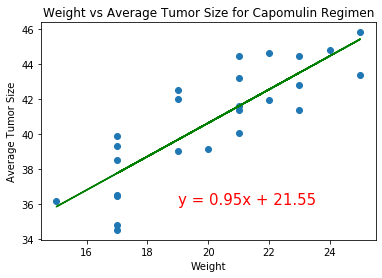

In [306]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Perform linear regression on mouse_weights vs. average tumor volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, mean_tumor_per_mouse)

# Multiply slope by mouse_weights data and add intercept to get regression values
regress_values = mouse_weights * slope + intercept

# Print predictive line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot values on scatter plot
plt.scatter(mouse_weights, mean_tumor_per_mouse)

# Plot line of mouse weights and their respective regression values
plt.plot(mouse_weights,regress_values,"g-")

# Add line equation to graph
plt.annotate(line_eq,(19,36),fontsize=15,color="red")

# Plot title, x and y labels and r value
plt.title("Weight vs Average Tumor Size for Capomulin Regimen")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Size")
print(f"The r-squared is: {rvalue}")